In [ ]:
import numpy as np

from keras import models
from keras import layers
from keras import activations
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

NUM_WORDS = 10000

NUM_CLASSES = 46

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=NUM_WORDS)

word_index = reuters.get_word_index()


def vectorize_sequences(sequences, dimension=NUM_WORDS):
    table = np.zeros(shape=(len(sequences), dimension), dtype=np.float32)
    for i, seq in enumerate(sequences):
        table[i, seq] = 1.0
    return table


def train_val_split(x, y):
    return (x[:1000], y[:1000]), (x[1000:], y[1000:])

In [62]:
def plot_history(history):
    hist_dict = history.history
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                                   sharex='all', figsize=(10, 7))
    ax0.plot(epochs, loss_values, 'bo')
    ax0.plot(epochs, val_loss_values, 'b+')
    ax0.set_ylabel('Loss')

    ax1.plot(epochs, acc_values, 'bo')
    ax1.plot(epochs, val_acc_values, 'b+')
    ax1.set_ylabel('Accuracy')

    plt.show()

In [70]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# using one-hot encodinf for labels
y_train = to_categorical(train_labels, num_classes=NUM_CLASSES)
y_test = to_categorical(test_labels, num_classes=NUM_CLASSES)

(partial_x_train, partial_y_train), (x_val, y_val) = train_val_split(x_train, y_train)

In [72]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation=activations.relu, input_shape=(NUM_WORDS,)))
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dense(units=NUM_CLASSES, activation=activations.softmax))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=512, epochs=20,
                    validation_data=(x_val, y_val))

Train on 1000 samples, validate on 7982 samples
Epoch 1/20
1000/1000 [==============================] - 0s - loss: 3.7868 - acc: 0.1490 - val_loss: 3.5454 - val_acc: 0.3463
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 3.3842 - acc: 0.4230 - val_loss: 3.1456 - val_acc: 0.5064
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 2.8679 - acc: 0.6440 - val_loss: 2.7501 - val_acc: 0.5918
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 2.3492 - acc: 0.6970 - val_loss: 2.4065 - val_acc: 0.6258
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.9204 - acc: 0.7480 - val_loss: 2.1796 - val_acc: 0.6107
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.6153 - acc: 0.7570 - val_loss: 2.0163 - val_acc: 0.6312
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.3624 - acc: 0.8070 - val_loss: 1.8705 - val_acc: 0.6488
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.1587 - a

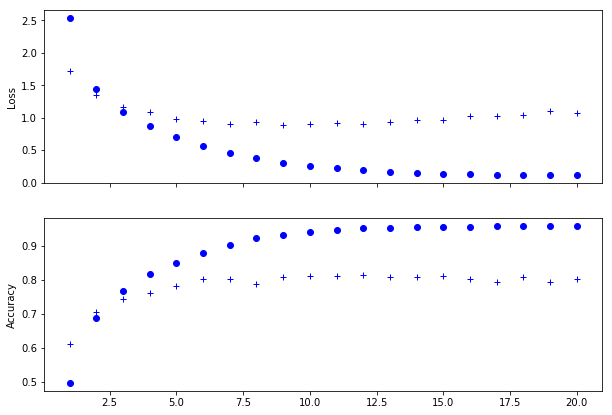

In [39]:
plot_history(history)

In [41]:
predictions = model.predict(x_test)

In [43]:
np.argmax(predictions, axis=1)

array([ 3, 10,  1, ...,  3,  3,  1])

In [53]:
np.split(np.arange(10), [2])

[array([0, 1]), array([2, 3, 4, 5, 6, 7, 8, 9])]

The same, but using array of ints as labels (without one-hot encoding)

In [ ]:
# labels as int arrays (using sparse cross entropy loss)
y_train = np.asarray(train_labels)
y_test = np.asarray(test_labels)

(partial_x_train, partial_y_train), (x_val, y_val) = train_val_split(x_train, y_train)

Train on 1000 samples, validate on 7982 samples
Epoch 1/20
1000/1000 [==============================] - 0s - loss: 5.4853 - acc: 0.1810 - val_loss: 4.8395 - val_acc: 0.4840
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 4.6268 - acc: 0.4960 - val_loss: 4.2420 - val_acc: 0.4757
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 4.0019 - acc: 0.5040 - val_loss: 3.8156 - val_acc: 0.5044
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 3.5299 - acc: 0.5540 - val_loss: 3.4843 - val_acc: 0.5306
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 3.1487 - acc: 0.5920 - val_loss: 3.2266 - val_acc: 0.5628
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 2.8514 - acc: 0.6330 - val_loss: 3.0404 - val_acc: 0.5882
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 2.6141 - acc: 0.6780 - val_loss: 2.8824 - val_acc: 0.6036
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 2.4153 - a

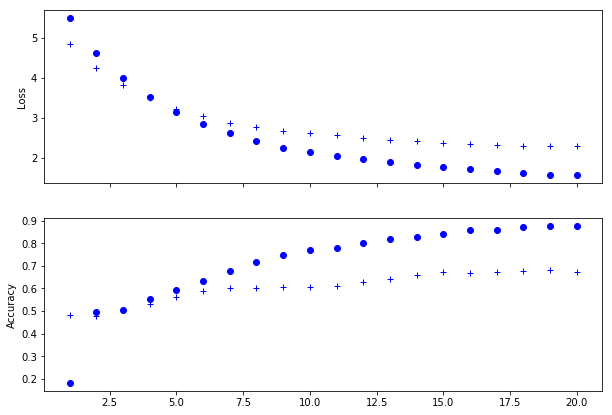

In [74]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation=activations.relu, kernel_regularizer=regularizers.l2(0.01), input_shape=(NUM_WORDS,)))
model.add(layers.Dense(units=64, activation=activations.relu, kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=NUM_CLASSES, activation=activations.softmax))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=512, epochs=20,
                    validation_data=(x_val, y_val))

plot_history(history)

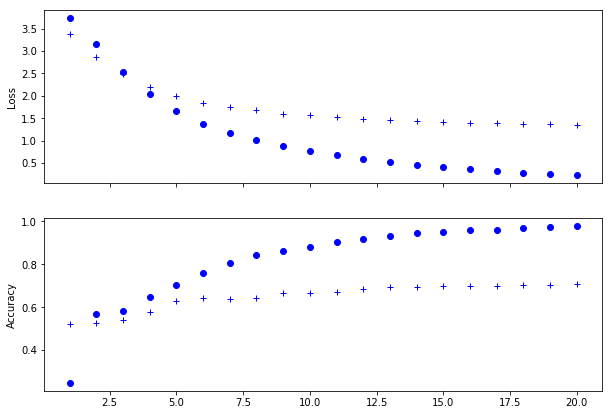

In [64]:
plot_history(history)

In [75]:
def train_and_plot(m):
    h = m.fit(x=partial_x_train, y=partial_y_train,
              batch_size=512, epochs=20,
              validation_data=(x_val, y_val))
    plot_history(h)

Train on 1000 samples, validate on 7982 samples
Epoch 1/20
1000/1000 [==============================] - 0s - loss: 3.7822 - acc: 0.1860 - val_loss: 3.5260 - val_acc: 0.4073
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 3.3473 - acc: 0.4700 - val_loss: 3.0969 - val_acc: 0.4733
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 2.8143 - acc: 0.5730 - val_loss: 2.7170 - val_acc: 0.5347
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 2.3244 - acc: 0.6440 - val_loss: 2.4021 - val_acc: 0.5814
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.9186 - acc: 0.7120 - val_loss: 2.1651 - val_acc: 0.5973
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.5966 - acc: 0.7510 - val_loss: 1.9836 - val_acc: 0.6371
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.3431 - acc: 0.7980 - val_loss: 1.8549 - val_acc: 0.6417
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.1473 - a

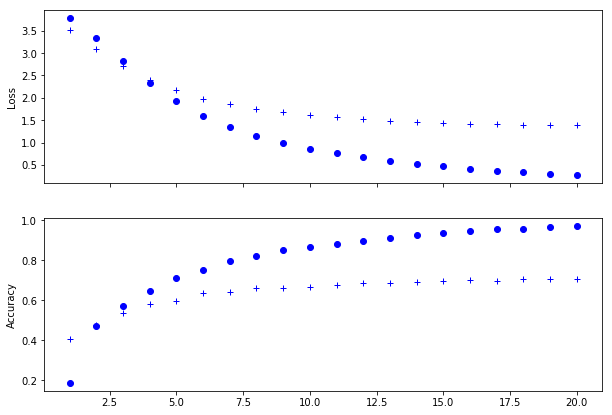

In [76]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation=activations.relu, input_shape=(NUM_WORDS,)))
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dense(units=NUM_CLASSES, activation=activations.softmax))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
train_and_plot(model)

Dropout

Train on 1000 samples, validate on 7982 samples
Epoch 1/20
1000/1000 [==============================] - 0s - loss: 3.7698 - acc: 0.0600 - val_loss: 3.5790 - val_acc: 0.4759
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 3.5069 - acc: 0.2280 - val_loss: 3.2444 - val_acc: 0.4788
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 3.1859 - acc: 0.3580 - val_loss: 2.9392 - val_acc: 0.4970
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 2.8909 - acc: 0.4200 - val_loss: 2.6848 - val_acc: 0.5081
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 2.6076 - acc: 0.4770 - val_loss: 2.4525 - val_acc: 0.5183
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 2.4167 - acc: 0.4840 - val_loss: 2.2661 - val_acc: 0.5288
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 2.2172 - acc: 0.5160 - val_loss: 2.1235 - val_acc: 0.5401
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 2.0583 - a

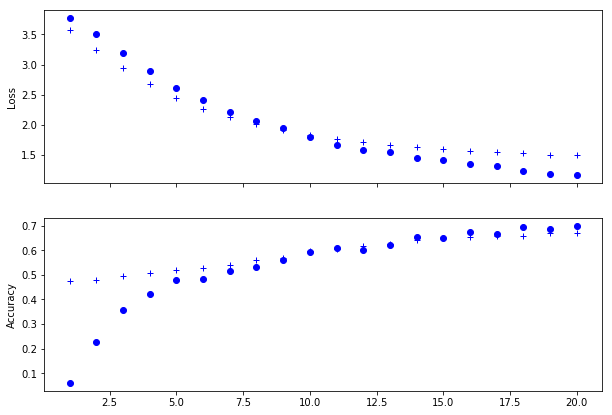

In [78]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation=activations.relu, input_shape=(NUM_WORDS,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=NUM_CLASSES, activation=activations.softmax))
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
train_and_plot(model)

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [82]:
l = model.get_layer(index=1)

In [90]:
l.get_weights()[0].shape, l.get_weights()[1].shape

((10000, 64), (64,))

In [92]:
l.get_weights()

[array([[-0.00648714,  0.00093781, -0.00519791, ..., -0.00088083,
         -0.02308309,  0.0102544 ],
        [ 0.05212323,  0.02272969,  0.01380597, ...,  0.00708513,
          0.04267592,  0.02906071],
        [ 0.02778848, -0.00905515, -0.00859334, ...,  0.00058277,
         -0.00826269,  0.01228805],
        ..., 
        [-0.00172019,  0.01615324, -0.00922148, ..., -0.00297321,
         -0.01907684,  0.0142938 ],
        [ 0.01538392,  0.01692404, -0.01398678, ..., -0.01308371,
          0.01516707, -0.01817286],
        [ 0.00356522, -0.01510791, -0.02718809, ...,  0.01059696,
          0.00347433,  0.00172098]], dtype=float32),
 array([ 0.03341747,  0.00120659,  0.03408289,  0.03721949,  0.03913962,
         0.03039206,  0.02127876,  0.01778788,  0.01153561,  0.00148784,
         0.04184243,  0.01653747,  0.026618  ,  0.03646997,  0.03603317,
         0.03550379,  0.009496  ,  0.01474375,  0.01197664,  0.03095589,
         0.02286549,  0.00400361,  0.00678237,  0.03030549,  0.03